Fibral Core Range for structure 2ZOQ: 24 to 375
{'Q': 0.764253505952381, 'G': 0.7588248065476191, 'A': 0.806930981927711, 'E': 0.7556883434650455, 'K': 0.7291397975830817, 'W': 0.6786704068767908, 'H': 0.7398641143695014, 'Y': 0.7326150778443113, 'P': 0.7383052102102102, 'V': 0.8117700776119403, 'D': 0.7461120787878788, 'F': 0.7574711533923305, 'R': 0.7426229667673717, 'M': 0.7586315102040817, 'L': 0.8222944516129032, 'S': 0.7911842245508982, 'N': 0.7625234513274336, 'T': 0.7947260688622755, 'C': 0.7254626040462427, 'I': 0.7920853220858896}
{'Q': 0.93496, 'G': 0.9581186315789473, 'A': 0.9821707142857143, 'E': 0.9644170000000001, 'K': 0.9575323703703703, 'W': 0.8535343703703704, 'H': 0.8736532592592593, 'Y': 0.8829852592592592, 'P': 0.9592312916666668, 'V': 0.9654021538461538, 'D': 0.9532676666666667, 'F': 0.8885950370370369, 'R': 0.9436077199999999, 'M': 0.8762898461538461, 'L': 0.9564326923076922, 'S': 0.9758840740740742, 'N': 0.9478343333333334, 'T': 0.9740032692307694, 'C': 0.873026

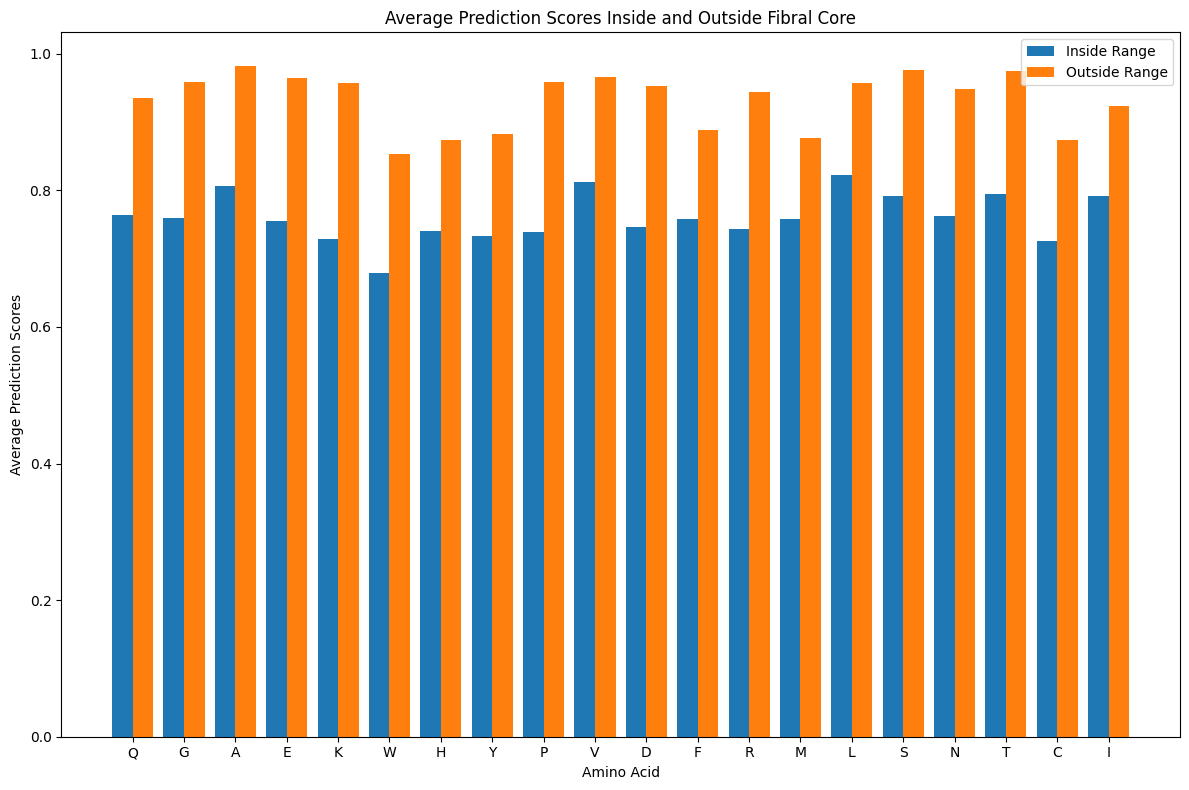

In [1]:
## This snippet is the generalization of fibral core averaging to observe 0 to 1 mutation prediction scores calculated by Envision AI. 
## The Envision AI csv file must be downloaded before script is run. 
## The purpose of this project is to observe the mutation behavior of amyloid proteins in the greater Amyloid Hypothesis,
## which suggests that the accumulation of amyloid protein in the brain is a major factor in Alzheimer's disease and other neurodegenerative disorders.

## author: Unda March 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import requests

##CHANGE BY USER######
protein_name = "P27361"
structure_name = "2ZOQ"
#######################

user = os.path.expanduser('~')
file_path = os.path.join(user, "Downloads", f"{protein_name}_envisionData.csv")
df = pd.read_csv(file_path)

# universal to all CSVs, relevant cols
pos = df['position'].tolist()
aa2 = df['AA2'].tolist()
prediction = df['Envision_predictions'].tolist()

# scrape fibral core data from online database
def find_fibral_core(structure_name):
    pdb_url = f"https://files.rcsb.org/view/{structure_name}.pdb"

    try:
        response = requests.get(pdb_url)

        if response.status_code == 200:
            pdb_content = response.text

            csv_content = []
            for line in pdb_content.splitlines():
                if line.startswith('ATOM'):
                    atom_info = line.split()
                    residue_number = int(atom_info[5])

                    csv_content.append(residue_number)

            df = pd.DataFrame({'Residue_Number': csv_content})

            fibral_core_min = df['Residue_Number'].min()
            fibral_core_max = df['Residue_Number'].max()

            print(f"Fibral Core Range for structure {structure_name}: {fibral_core_min} to {fibral_core_max}")

        else:
            print("Failed to fetch the PDB file.")

    except Exception as e:
        print(f"An error occurred: {e}")
    
    return fibral_core_min, fibral_core_max

# establish min and max values for fibral core range
fibral_core_min, fibral_core_max = find_fibral_core(structure_name)

inside_range = {letter: [] for letter in set(aa2)}
outside_range = {letter: [] for letter in set(aa2)}

# loop through simultaneously
for p, a, pred in zip(pos, aa2, prediction): 
    if fibral_core_min <= p <= fibral_core_max:
        inside_range[a].append(pred)
    else:
        outside_range[a].append(pred)

# new dictionary of letters (amino acids) and averages
inside_averages = {letter: np.mean(scores) for letter, scores in inside_range.items()}
outside_averages = {letter: np.mean(scores) for letter, scores in outside_range.items()}

print(inside_averages)
print(outside_averages)


letters = list(set(aa2))
inside_avg_values = [inside_averages[letter] for letter in letters]
outside_avg_values = [outside_averages[letter] for letter in letters]

fig, ax = plt.subplots(figsize=(12, 8))

index = np.arange(len(letters))
bar_width = 0.4

bar1 = ax.bar(index, inside_avg_values, bar_width, label='Inside Range')
bar2 = ax.bar(index + bar_width, outside_avg_values, bar_width, label='Outside Range')

ax.set_xlabel('Amino Acid')
ax.set_ylabel('Average Prediction Scores')
ax.set_title('Average Prediction Scores Inside and Outside Fibral Core')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(letters)
ax.legend()


plt.tight_layout()
plt.show()